In [1]:
import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import random
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_1 = np.array([[random.randint(1, 400) for i in range(2)] for j in range(50)],
                  dtype=np.float64)
data_2 = np.array([[random.randint(300, 700) for i in range(2)] for j in range(50)],
                  dtype=np.float64)
data_3 = np.array([[random.randint(600, 900) for i in range(2)] for j in range(50)],
                  dtype=np.float64)

data = np.append(np.append(data_1, data_2, axis=0), data_3, axis=0)

In [3]:
data.shape

(150, 2)

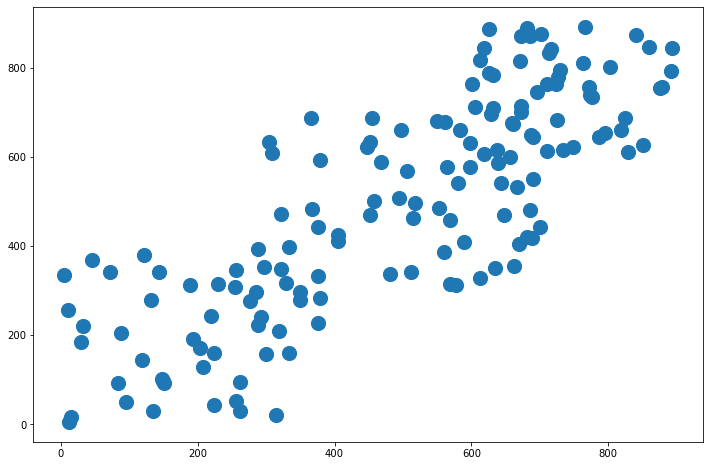

In [4]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(data[:, 0], data[:, 1], s=200);

In [5]:
labels_1 = np.array([0 for i in range(50)])
labels_2 = np.array([1 for i in range(50)])
labels_3 = np.array([2 for i in range(50)])
labels = np.append(np.append(labels_1, labels_2, axis=0), labels_3, axis=0)
print(labels.shape)

(150,)


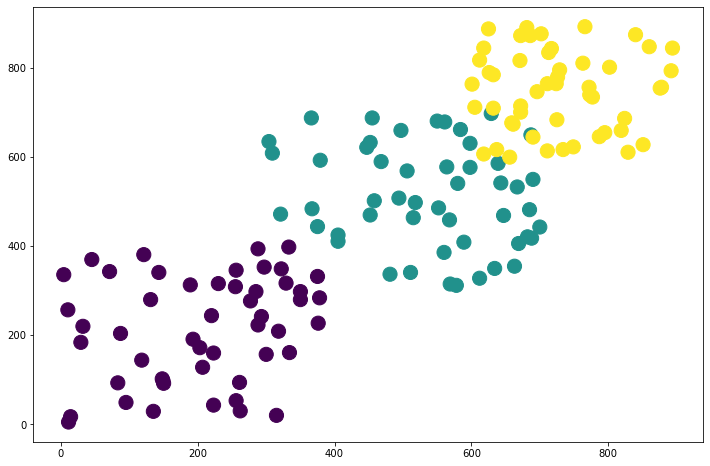

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(data[:, 0], data[:, 1], s=200, c=labels);

In [8]:
df = pd.DataFrame(data, columns=['x', 'y'])
df['label'] = labels
df.sample(10)

,x,y,label
106,672.0,873.0,2
4,378.0,284.0,0
97,309.0,609.0,1
90,580.0,541.0,1
44,10.0,257.0,0
24,277.0,277.0,0
102,717.0,844.0,2
52,561.0,679.0,1
141,878.0,757.0,2
121,840.0,875.0,2


In [9]:
kmeans_model = KMeans(n_clusters=3, random_state=1, max_iter=10000).fit(data)

In [10]:
centroids = kmeans_model.cluster_centers_
centroids

array([[538.54901961, 511.09803922],
       [207.24      , 215.26      ],
       [729.91836735, 754.53061224]])

In [11]:
print(f'Homogeneity Score: {metrics.homogeneity_score(labels, kmeans_model.labels_)}')
print(f'Completeness Score: {metrics.completeness_score(labels, kmeans_model.labels_)}')
print(f'V-measure Score: {metrics.v_measure_score(labels, kmeans_model.labels_)}')
print(f'Adjusted Rand Score: {metrics.adjusted_rand_score(labels, kmeans_model.labels_)}')
print(f'Adjusted Mutual Info Score: {metrics.adjusted_mutual_info_score(labels, kmeans_model.labels_)}')
print(f'Silhouette Coefficient: {metrics.silhouette_score(data, kmeans_model.labels_)}')

Homogeneity Score: 0.8800572622440009
Completeness Score: 0.8801640906840564
V-measure Score: 0.8801106732223012
Adjusted Rand Score: 0.9037141640512019
Adjusted Mutual Info Score: 0.8786101813903087
Silhouette Coefficient: 0.46792128183713555


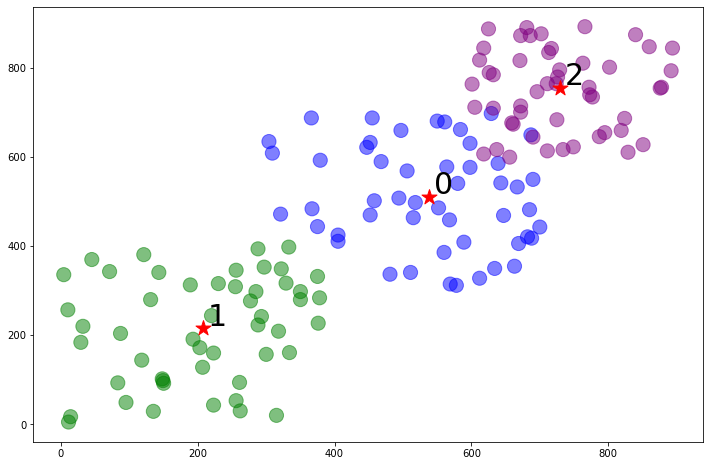

In [12]:
colors = 'green blue purple'.split()
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(df['x'], df['y'], s=200, c=df['label'], cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=250, c='r')
for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=30)

In [14]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
4,5.0,3.6,1.4,0.2,0
67,5.8,2.7,4.1,1.0,1
136,6.3,3.4,5.6,2.4,2
53,5.5,2.3,4.0,1.3,1
105,7.6,3.0,6.6,2.1,2
111,6.4,2.7,5.3,1.9,2
73,6.1,2.8,4.7,1.2,1
9,4.9,3.1,1.5,0.1,0
141,6.9,3.1,5.1,2.3,2
82,5.8,2.7,3.9,1.2,1


In [15]:
df = df.sample(frac=1, random_state=1).reset_index(drop=True)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.8,4.0,1.2,0.2,0
1,5.1,2.5,3.0,1.1,1
2,6.6,3.0,4.4,1.4,1
3,5.4,3.9,1.3,0.4,0
4,7.9,3.8,6.4,2.0,2


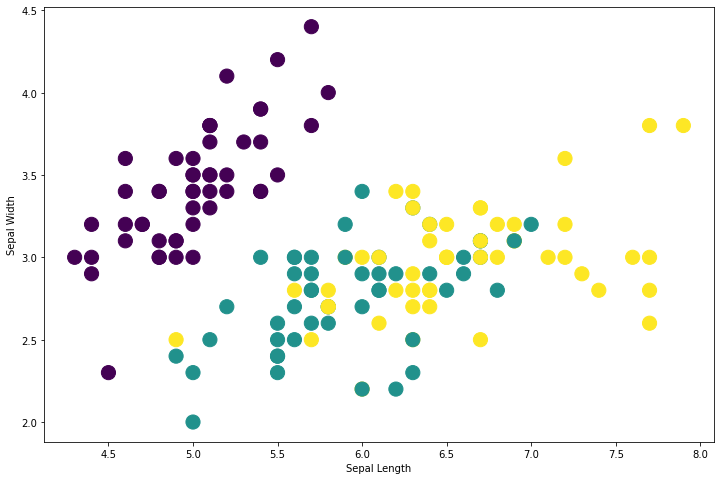

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], s=200, c=df['label'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show;

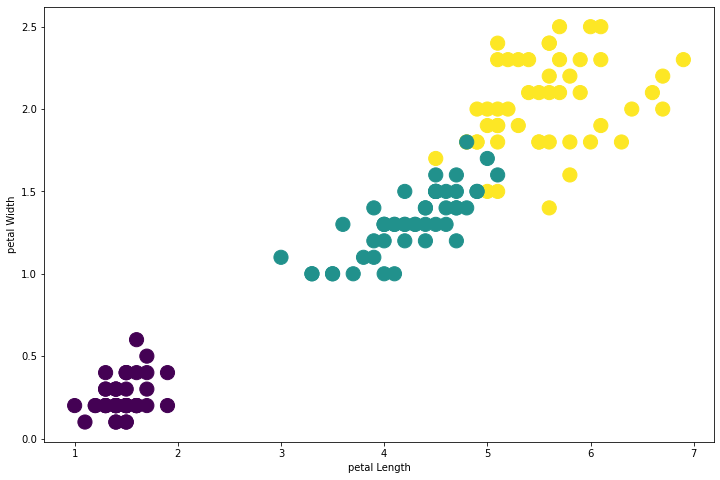

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], s=200, c=df['label'])
plt.xlabel('petal Length')
plt.ylabel('petal Width')
plt.show;

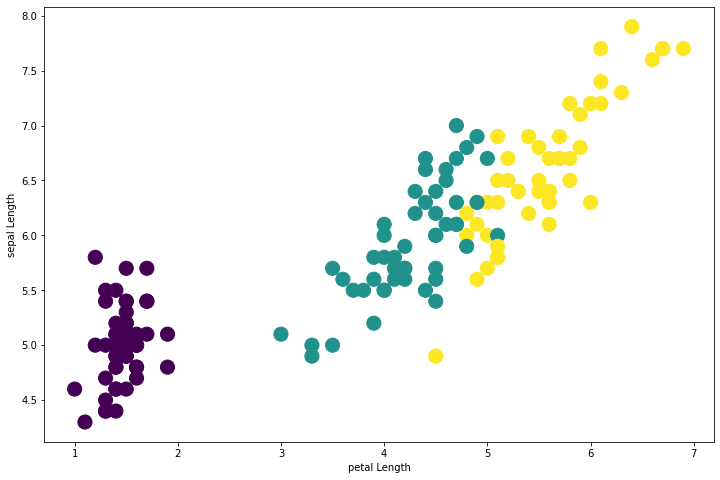

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(df['petal length (cm)'], df['sepal length (cm)'], s=200, c=df['label'])
plt.xlabel('petal Length')
plt.ylabel('sepal Length')
plt.show;

In [19]:
iris_2d = df[['sepal length (cm)', 'petal length (cm)']]

In [20]:
kmeans_model = KMeans(n_clusters=3, random_state=1, max_iter=10000).fit(iris_2d)
kmeans_model.labels_

array([0, 0, 2, 0, 1, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 2, 2, 0, 0, 2, 2,
       1, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 1, 0, 2, 1,
       2, 1, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 2, 2, 1, 2, 0, 2, 2, 0, 0, 1,
       0, 2, 1, 2, 2, 1, 2, 0, 2, 2, 1, 2, 1, 2, 0, 0, 0, 1, 0, 2, 1, 2,
       0, 0, 2, 0, 1, 2, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 0, 1, 0, 0, 1,
       2, 1, 0, 0, 2, 0, 2, 0, 1, 2, 0, 1, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2,
       2, 0, 2, 2, 2, 1, 2, 0, 0, 1, 2, 1, 2, 1, 1, 2, 1, 0])

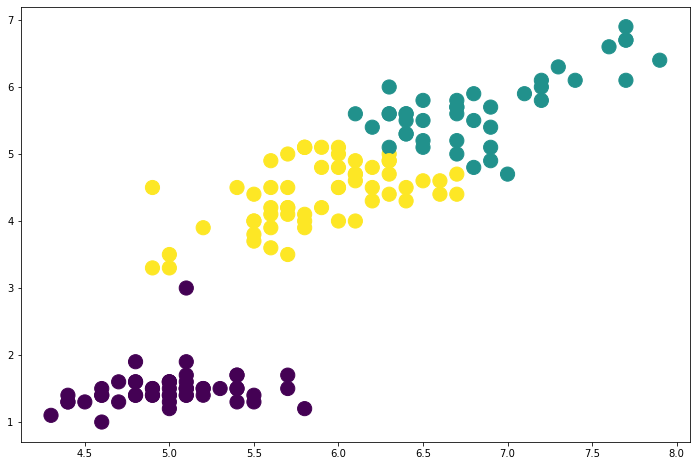

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(iris_2d['sepal length (cm)'], iris_2d['petal length (cm)'], s=200, c=kmeans_model.labels_);

In [23]:
target = df['label']
print(f'Homogeneity Score: {metrics.homogeneity_score(target, kmeans_model.labels_)}')
print(f'Completeness Score: {metrics.completeness_score(target, kmeans_model.labels_)}')
print(f'V-measure Score: {metrics.v_measure_score(target, kmeans_model.labels_)}')
print(f'Adjusted Rand Score: {metrics.adjusted_rand_score(target, kmeans_model.labels_)}')
print(f'Adjusted Mutual Info Score: {metrics.adjusted_mutual_info_score(target, kmeans_model.labels_)}')
print(f'Silhouette Coefficient: {metrics.silhouette_score(iris_2d, kmeans_model.labels_)}')

Homogeneity Score: 0.7033177646052958
Completeness Score: 0.7096993707802843
V-measure Score: 0.706494157075837
Adjusted Rand Score: 0.6988627672348092
Adjusted Mutual Info Score: 0.7028024531409133
Silhouette Coefficient: 0.5890584158017611
